In [ ]:
import numpy as np
import cv2
from PIL import Image
import math
import matplotlib.pyplot as plt

## Load images

In [136]:
person = cv2.imread("/content/myself1.jpg")
person = cv2.cvtColor(person, cv2.COLOR_BGR2RGB)

# background = cv2.imread("/content/Background1.jpg")
background = cv2.imread("/content/Background2.webp")  #background 2
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

In [137]:
# Resize the person image to match the Background image size
person = cv2.resize(person, (background.shape[1], background.shape[0]))

# Convert the person image to grayscale
gray_person = cv2.cvtColor(person, cv2.COLOR_RGB2GRAY)

In [138]:
# Apply thresholding to create a mask
_, mask = cv2.threshold(gray_person, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
blurred_mask = cv2.GaussianBlur(mask, (3, 3), 0)

# Normalize the blurred mask to range between 0 and 1
normalized_mask = blurred_mask / 255.0

In [139]:
# Create alpha channel by duplicating the normalized mask
alpha = np.dstack((normalized_mask, normalized_mask, normalized_mask))

# Resize the alpha channel to match the dimensions of the person and background images
resized_alpha = cv2.resize(alpha, (background.shape[1], background.shape[0]))

# Blend the images using the resized alpha channel
result = (resized_alpha * person) + ((1 - resized_alpha) * background)
result = result.astype(np.uint8)

## Kernel 3 (Weighted Average Filter,Gaussian Filter)

In [141]:
# Apply Weighted Average Filter with kernel size 3
weighted_avg_filter_3 = np.ones((3, 3), dtype=np.float32) / 9.0
result_filtered_3 = cv2.filter2D(result, -1, weighted_avg_filter_3)

In [142]:
# Apply Gaussian Filter with kernel size 3
result_gaussian_3 = cv2.GaussianBlur(result, (3, 3), 0)

## Kernel 5 (Weighted Average Filter,Gaussian Filter)

In [143]:
# Apply Weighted Average Filter with kernel size 5
weighted_avg_filter_5 = np.ones((5, 5), dtype=np.float32) / 25.0
result_filtered_5 = cv2.filter2D(result, -1, weighted_avg_filter_5)

In [144]:
# Apply Gaussian Filter with kernel size 5
result_gaussian_5 = cv2.GaussianBlur(result, (5, 5), 0)

## Results

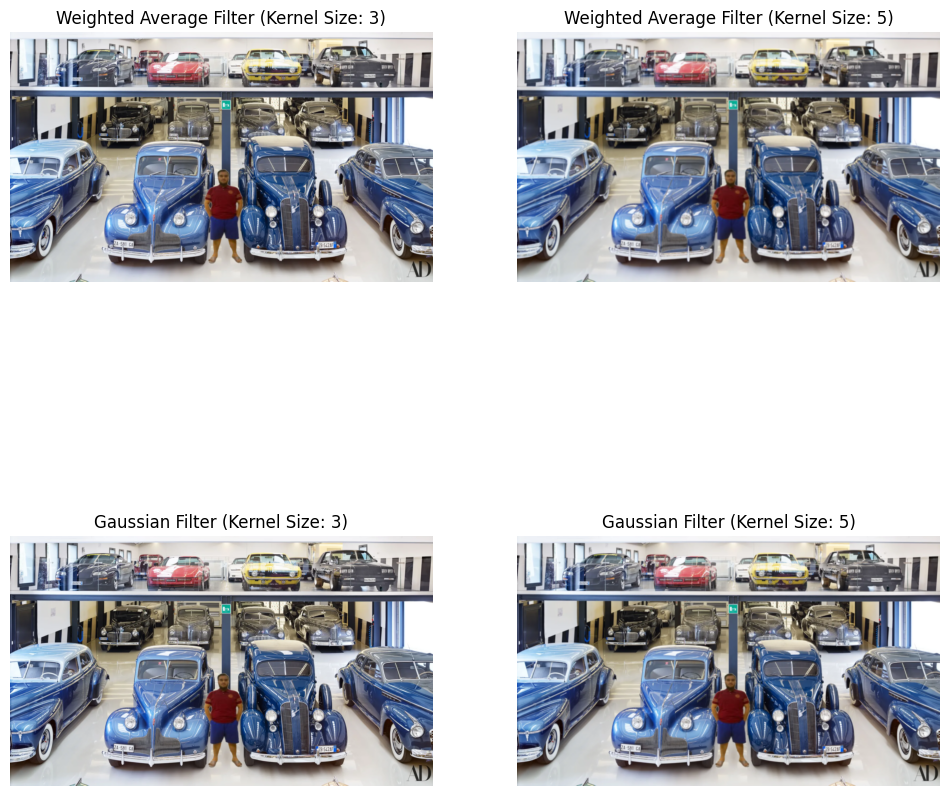

In [145]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].imshow(result_filtered_3)
axs[0, 0].set_title('Weighted Average Filter (Kernel Size: 3)')

axs[0, 1].imshow(result_filtered_5)
axs[0, 1].set_title('Weighted Average Filter (Kernel Size: 5)')

axs[1, 0].imshow(result_gaussian_3)
axs[1, 0].set_title('Gaussian Filter (Kernel Size: 3)')

axs[1, 1].imshow(result_gaussian_5)
axs[1, 1].set_title('Gaussian Filter (Kernel Size: 5)')

for ax in axs.flat:
    ax.axis('off')

plt.show()